<a href="https://colab.research.google.com/github/ahmedtarek-/MI_2022/blob/main/Exercise_08/Exercise_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Sheet 08 (Statistical Learning Theory)


--

### Ex. 8.2 Variability of classification

**1) Generate the numbers in C1, C2**

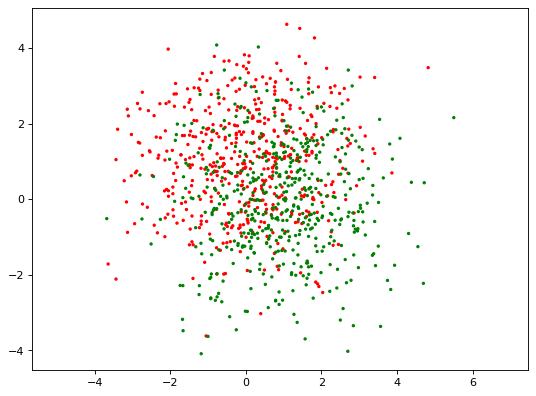

((2, 1000), (1000,), (1000, 3))

In [12]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6), dpi=80)

def generate_data(p, plot=False):
  mu_1 = np.array([0,1])
  mu_2 = np.array([1,0])
  cov = 2*np.identity(2)
  
  if p%2==1:
    clust_size_1 = int(p/2)
    clust_size_2 = int(p/2) + 1
  else:
    clust_size_1 = clust_size_2 = int(p/2)

  x1 = np.random.multivariate_normal(mu_1, cov, clust_size_1)
  x2 = np.random.multivariate_normal(mu_2, cov, clust_size_2)
  x = np.concatenate((x1, x2), axis=0)

  ones = np.ones(clust_size_1)
  n_ones = -1*np.ones(clust_size_2)
  y = np.concatenate((ones, n_ones), axis=0)
  r = np.concatenate((x.T[0], x.T[1], y), axis=0).reshape(3, p).T

  if plot == True:
    color = ['red' if l == 1 else 'green' for l in r.T[2]]
    plt.scatter(r.T[0], r.T[1], color=color, s=4)
    plt.axis('equal')
    plt.show()
  return x.T, y.T, r

# Testing the generate data method
p = 1000
x, y, r = generate_data(p, plot=True)

x.shape, y.shape, r.shape

**2) Connectionist Neurons**

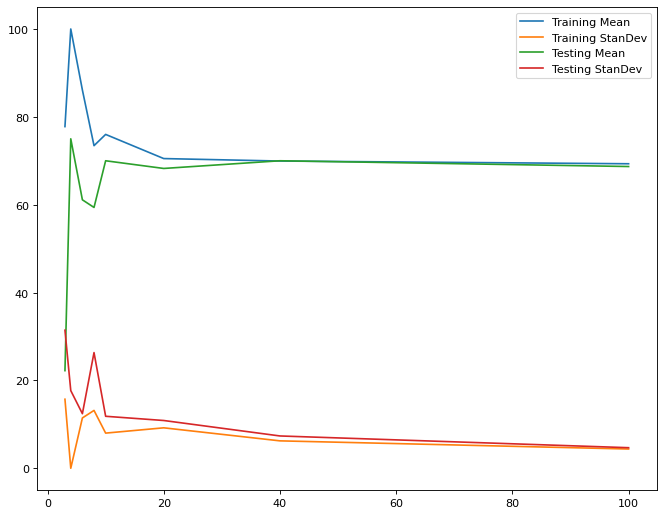

In [15]:
class PerceptronNeuron:
  def __init__(self, weight_vector, bias=0):
    self.weight_vector = np.array(weight_vector)
    self.bias = bias
      
  def evaluate_dataset(self, x_test, y_test):
    evaluated_results = np.sign(np.dot(self.weight_vector.T, x_test))
    correct_results = [eval_r == true_r for eval_r, true_r in zip(evaluated_results, y_test)]
    correct_results_count = np.array(correct_results).sum()
    return (correct_results_count / len(y_test)) * 100 

# def 
def repeat_50_for_p(p):
  weights = []
  test_perc = []
  train_perc = []
  for i in range(p):
    x_train, y_train, r = generate_data(p)

    # 1. Calculate the weight vector analytically
    w_interm_1 = np.linalg.inv(np.dot(x_train, x_train.T))       # 2x2
    w_interm_2 = np.dot(x_train, y_train.T)                      # 2x1
    w = np.dot(w_interm_1, w_interm_2)               # 2x1

    # 2. Make a prediction using the Neuron
    x_test, y_test, data_test = generate_data(p)
    test_percentage = PerceptronNeuron(w).evaluate_dataset(x_test, y_test)
    train_percentage = PerceptronNeuron(w).evaluate_dataset(x_train, y_train)    
    
    weights.append(w)
    test_perc.append(test_percentage)
    train_perc.append(train_percentage)
  
  train_mean = np.mean(np.array(train_perc))
  train_std = np.std(np.array(train_perc))
  test_mean = np.mean(np.array(test_perc))
  test_std = np.std(np.array(test_perc))
  return p, train_mean, train_std, test_mean, test_std, weights



different_ps = [3, 4, 6, 8, 10, 20, 40, 100]

train_means = []
train_stds = []
test_means = []
test_stds = []
for p in different_ps:
  res = repeat_50_for_p(p)
  train_means.append(res[1])
  train_stds.append(res[2])
  test_means.append(res[3])
  test_stds.append(res[4])

plt.figure(figsize=(10, 8), dpi=80)
plt.plot(different_ps, train_means, label="Training Mean")
plt.plot(different_ps, train_stds, label="Training StanDev")
plt.plot(different_ps, test_means, label="Testing Mean")
plt.plot(different_ps, test_stds, label="Testing StanDev")
plt.legend()
plt.show()

In [3]:
np.sign(np.array([1,2,3,-454]))

array([ 1,  1,  1, -1])